# Wasserstein GAN

L'objectif de ce projet était d'étudier les GANs dans le cas de la distance de Wasserstein.

Voici les membres de notre groupe classés par ordres alphabétiques pour leur nom de famille :
- Paul Corbalan
- Nicolas Gonel
- Oihan Joyot
- Tristan Portugues
- Florian Zorzynski

Notre projet s'inspire grandement des ressources suivantes qui sont l'article initial de notre projet ainsi que le code correspondant.
- Article : [[1701.07875] Wasserstein GAN (arxiv.org)](https://arxiv.org/abs/1701.07875)
- Code : [martinarjovsky/WassersteinGAN (github.com)](https://github.com/martinarjovsky/WassersteinGAN)

Un répertoire pour ce projet en général est disponible à l'adresse suivante :
https://github.com/paul-corbalan/wasserstein-gan

---

## Introduction

Les Réseaux Antagonistes Génératifs (GANs) représentent une avancée majeure dans le domaine de l'apprentissage profond, révolutionnant la manière dont les machines comprennent et génèrent des données, en particulier des images. Cette technologie imite la façon dont les humains apprennent et créent, ouvrant des portes vers des applications innovantes allant de l'art numérique à des solutions médicales avancées. Le projet "Wasserstein GAN" s'inscrit dans cette perspective, visant à explorer une variante spécifique des GANs qui utilise la distance de Wasserstein pour améliorer la stabilité et la qualité des résultats.

Le choix de la distance de Wasserstein comme métrique clé dans notre projet offre un avantage distinct sur les méthodes traditionnelles. Elle permet de surmonter certains des défis inhérents aux GANs classiques, comme le mode collapse et les problèmes de convergence. En se concentrant sur cette approche, notre projet cherche à démontrer comment une compréhension approfondie de la théorie mathématique peut être appliquée efficacement pour améliorer la performance et la fiabilité des modèles génératifs.

Ce notebook est conçu pour servir d'outil d'apprentissage et d'exploration dans le domaine des GANs, avec un accent particulier sur les Wasserstein GANs. Il guide le lecteur à travers les principes fondamentaux, les défis et les solutions uniques associés à cette technologie, offrant un mélange d'explications théoriques et d'applications pratiques. L'objectif est de fournir une base solide pour comprendre et utiliser les Wasserstein GANs.

## Generative Adversarial Network (GAN)

Les GANs sont des modèles d'apprentissage profond définis par deux réseaux neuronaux, le générateur $G$ et le discriminateur $D$.

 Le générateur crée des données, tandis que le discriminateur les évalue. L'objectif du générateur est d'approcher un distribution $\mathbb{P}_g$ inconnue telle que les données générées $G(z)$ soient indiscernables des données réelles $x$, où $z$ un vecteur de notre espace latent. Le discriminateur est entraîné à faire la distinction entre un inputs et $x$.

 Les deux modèles sont mis en compétition et $G$ cherche à minimiser la probabilité que $D$ fasse la distinction entre $G(z)$ et $x$, tandis que $D$ cherche à maximiser cette probabilité.

Formellement, cela correspond à résoudre le problème min-max pour :
$$V(D, G) = \mathbb{E}_{x \sim \mathbb{P}_{r}}[\log D(x)] + \mathbb{E}_{z \sim \mathbb{P}_z}[\log(1 - D(G(z)))]$$
où  le problème est le suivant :
$$
\min _G \max _D V(D, G)
$$

 Cette minimisation utilise la log-vraissemblance négative et est la solution d'origine pour arriver à un équilibre entre le générateur et le discriminateur. Cependant cette méthode peut présenter plusieurs problèmes:
 - des "modes collapse" où l'entraînement converge vers une solution oubliant certaines particularités de la distibution cherché.
 - des gradients évanescents, lorsque le discriminateur devient trop parfait, il devient impossible de générer un gradient utilisable à partir de la sortie du discriminateur.

 On va donc chercher un moyen de résoudre ces problèmes en changeant de fonction de perte et on va essayer d'utiliser la distance de wasserstein.

## Distance de Wasserstein

### Définition

En mathématiques, la distance de Wasserstein est une fonction définie entre des distributions de probabilité sur un espace métrique donné $(M,d)$. La distance de Wasserstein d'ordre $p \in \left[1,+\infty \right]$ entre deux mesures de probabilité $\mu$ et $\nu$ définies sur $M$ (avec des moments finis de l'ordre $p$) est définie par :

\begin{equation}
\begin{split}
{\displaystyle W_{p}(\mu ,\nu )=\left(\inf _{\gamma \in \Gamma (\mu ,\nu )}\mathbf {E} _{(x,y)\sim \gamma }d(x,y)^{p}\right)^{1/p}.}
\end{split}
\end{equation}

L'infimum est pris sur $\Gamma (\mu,\nu )$, l'ensemble de tous les couplages dont les distributions marginales sont respectivement $\mu$ et $\nu$.

### Interprétation physique

Cette métrique est également connue sous le nom de earth mover distance. De manière intuitive, si l'on imagine chaque distribution comme une unité de terre empilée sur un espace métrique $M$, la métrique représente le coût minimal pour remodeler une pile en une autre. Ce coût est conçu comme la quantité de terre à déplacer, multipliée par la distance moyenne qu'elle doit parcourir.

En d'autres termes, la distance de Wasserstein fournit une mesure précise du coût minimal nécessaire pour transformer une distribution de probabilité en une autre, tout en minimisant le coût total de ce déplacement. C'est pourquoi l'avantage de cette distance réside dans son incorporation des concepts de transport optimal et de couplage, tous deux pertinents et pratiques pour l'étude.

### Utilisation pour les images numériques

Pour résumer, la distance de Wasserstein est une manière naturelle de comparer les distributions de probabilité de deux variables, où une variable est dérivée de l'autre par de petites perturbations non uniformes (aléatoires ou déterministes). C'est pourquoi, en informatique, cette métrique est largement utilisée pour comparer des distributions discrètes, notamment les histogrammes de couleur de deux images numériques.


### Calcul numérique

Le problème principal de cette distance est son calcul, l'infimum étant très compliqué à calculer. Heureusement, la dualité de Kantorovich-Rubinstein nous donne :
\begin{equation}
W(\mathbb{P}_r, \mathbb{P}_{\theta})=\frac{1}{K}\sup_{||f||<K}\mathbb{E}_{x\sim\mathbb{P}_r}[f(x)]-\mathbb{E}_{x\sim\mathbb{P}_\theta}[f(x)]
\end{equation}
Où le supremum est calculé sur toutes les fonctions lipschitz de coefficient inférieur à K. Afin de pouvoir calculer ce supremum on suppose qu'il est atteint pour une famille paramétrique $(f_w)_{w \in W}$ :
\begin{equation}
W(\mathbb{P}_r, \mathbb{P}_{\theta})=\frac{1}{K}\max_{w \in W}\mathbb{E}_{x\sim\mathbb{P}_r}[f_w(x)]-\mathbb{E}_{x\sim\mathbb{P}_\theta}[f_w(x)]
\end{equation}
Si l'on rapporte cette vision à notre problème, on a alors :
\begin{equation}
W(\mathbb{P}_r, \mathbb{P}_{\theta})=\frac{1}{K}\max_{w \in W}\mathbb{E}_{x\sim\mathbb{P}_r}[f_w(x)]-\mathbb{E}_{z\sim p(z)}[f_w(g_\theta(z))]
\end{equation}
où $f_w$ est le réseau de neurone discriminateur (ou critique) dont les poids sont $w$ et $g_\theta$ le réseau de neurone générateur dont les poids sont $\theta$.
Il ne restera plus alors qu'à faire en sorte que le générateur diminue cette distance et il apprendra peu à peu la distribution. Or on a aussi le résultat suivant :
\begin{equation}
\nabla_\theta W (P_r , P_\theta ) = -E_{z \sim p(z)}[\nabla_\theta f (g_\theta (z))]
\end{equation}
Ce qui nous donne une direction de descente.
On a ainsi le code suivant :

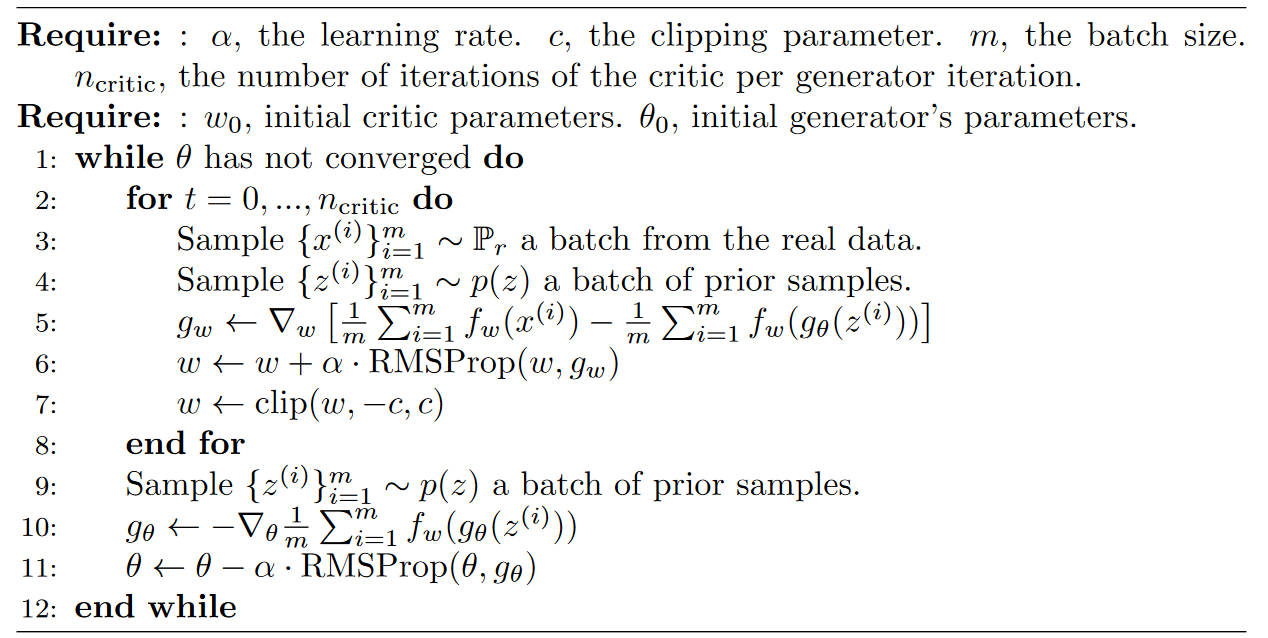

En résumé, le discriminant ne se contente plus de distinguer entre vrai et faux, il calcule une approximation de la distance entre les distributions, que le générateur cherche à diminuer. Il est important de noter que ici le caractère lipschitz est assuré par un clipping, ce qui est assez brutal, et il est possible que d'autres contraintes soient meilleurs en terme de résultat et plus adapté au problème.

## Propriétés importantes de la distance de Wasserstein

### Convergence en distribution

Soit $\mathbb{P}$ une distribution sur un espace compact $\mathcal{X}$ et $(\mathbb{P}_n)_{n \in \mathbb{N}}$ soit une séquence de distributions sur $\mathcal{X}$ :
$$W(\mathbb{P}_n, \mathbb{P}) \to 0 \Leftrightarrow \mathbb{P}_n \xrightarrow{\mathcal{L}} \mathbb{P}$$

Cette convergence est importante dans les GANs car elle assure que les échantillons générés par le modèle imitent de plus en plus fidèlement la distribution réelle des données. Contrairement à d'autres mesures de divergence, la distance de Wasserstein tient compte de la structure géométrique de l'espace des données, offrant ainsi une approche plus naturelle pour comparer des distributions.


### Continuité et différentiabilité

Considérons une fonction $g : \mathcal{Z} \times \mathbb{R}^d \rightarrow \mathcal{X}$, notée $g_\theta(z)$, où $z \in \mathcal{Z}$ et $\theta \in \mathbb{R}^d$. Soit $\mathbb{P}_\theta$ la distribution de $g_\theta(Z)$, où $Z$ est une variable aléatoire suivant une certaine distribution sur $\mathcal{Z}$. Dans ce cadre, la distance de Wasserstein $W(\mathbb{P}, \mathbb{P}_\theta)$ présente des propriétés distinctives :
1. **Continuité spécifique à la distance de Wasserstein :** Si $g$ est continue en $\theta$, alors $W(\mathbb{P}, \mathbb{P}_\theta)$ est également continue.
2. **Différentiabilité particulière de la distance de Wasserstein :** Sous l'hypothèse où $g$ est localement Lipschitz avec des constantes locales de Lipschitz $L(\theta, z)$ telles que $\mathbb{E}_{z \sim p}[L(\theta, z)] < +\infty$, la distance de Wasserstein $W(\mathbb{P}, \mathbb{P}_\theta)$ est continue partout et différentiable presque partout.
3. **Contraste avec d'autres divergences :** Contrairement à la distance de Wasserstein, la divergence Jensen-Shannon $JS(\mathbb{P}, \mathbb{P}_\theta)$ et les divergences KL ne partagent pas les mêmes propriétés de continuité et de différentiabilité décrites ci-dessus. Ceci offre plusieurs avantages : Il devient possible de faire une descente de gradient sur la distance de Wassertein. On récupère des gradients propres, sans gradient évanescent. Il est possible d'entrainer le discriminant jusqu'à optimalité sans avoir de surapprentissage. C'est même le contraire, entrainer le discriminateur jusqu'à optimalité garantit une distance plus fidèle.



## Prérequis pour l'exécution du code
### Importation des librairies

In [ ]:
# Future imports
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

# Pytorch dependencies
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable

# System dependencies
import argparse
import random
import os
import json
import shutil
import re

# Array processing
import numpy as np
import pandas as pd

# Display
import matplotlib.pyplot as plt
from torchviz import make_dot

# Image processing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skimage import io
import seaborn as sns

## Création de l'ensemble de données

L'ensemble de données original a été téléchargé à partir de
https://www.mediafire.com/file/z6wbmo2aqxkztcm/Skins.tar/file

Pour recadrer les images, les redimensionner, supprimer le canal alpha, faire des montages etc... le paquetage GNU [ImageMagick](https://imagemagick.org/) a été grandement utilisé.

### Prétraitements

La première étape a consisté à extraire les faces des skins. Cette opération a été réalisée à l'aide de la commande :
```shell
convert *.png -crop 8x8+8+8 heads/*.png
```

La deuxième étape consistait à trier les visages humains par rapport aux visages non-humains.

Nous décrivons ici la méthode utilisée, inspirée de l'apprentissage actif :
1. Tri manuel de $n=1000$ images
2. Entraînement d'un MLP sur cette classification
3. Tri de $10\times n$ images avec le MLP
4. Correction manuelle du tri
5. Revenir à l'étape $2$ jusqu'à ce qu'un dixième de l'ensemble de données soit trié
6. Utiliser le modèle pour déplacer les images dont le score de prédiction est supérieur à 70%.

Le script suivant a été créé pour entraîner, évaluer les performances du classificateur MLP et déplacer les fichiers à partir des prédictions.

In [ ]:
def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png')):
            img_path = os.path.join(folder_path, filename)
            img = io.imread(img_path)
            r = np.array(img).ravel()
            if r.size == 256 : images.append(r)
    return images

human_faces_data = np.stack(load_images('humans'))
non_human_faces_data = np.stack(load_images('nohumans'))


human_labels = np.ones(human_faces_data.shape[0])
non_human_labels = np.zeros(non_human_faces_data.shape[0])

X = np.concatenate([human_faces_data, non_human_faces_data])
y = np.concatenate([human_labels, non_human_labels])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
perceptron_model = MLPClassifier(hidden_layer_sizes=(8,8,8,8), solver="lbfgs", activation="relu", max_iter=10000)

perceptron_model.fit(X_train, y_train)

y_pred = perceptron_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep) # Recall is the important metric


conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Human', 'Human'],
            yticklabels=['Non-Human', 'Human'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle('Example Predictions')

for i in range(5):
    axes[0, i].imshow(X_test[i].reshape((8, 8, 4))[:,:,0])
    axes[0, i].set_title(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}")
    axes[0, i].axis('off')

    axes[1, i].imshow(X_test[i + 5].reshape((8, 8, 4))[:,:,0])
    axes[1, i].set_title(f"Actual: {y_test[i + 5]}, Predicted: {y_pred[i + 5]}")
    axes[1, i].axis('off')

plt.show()


def predict_and_move(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png')):
            img_path = os.path.join(folder_path, filename)
            img = io.imread(img_path)
            img_flat = img.reshape(1, -1)
            if img.size==256:
                if perceptron_model.predict_proba(img_flat)[0, 1] > 0.7:
                    print(f"Image {filename} is predicted as a human face and will be moved.")
                    shutil.copy(os.path.join(folder_path, filename), 'predicted_humans')


predict_and_move("..")

confusion.svg

L'ensemble de données a ensuite été mis à l'échelle pour appliquer le filtre de convolution à l'aide de la commande :
```shell
convert *.png resized 400% *upscaled*/*.png
```

Les données finales peuvent être téléchargées sur :
https://github.com/paul-corbalan/wasserstein-gan/blob/develop/data/predicted_humans.zip

## Architecture du modèle GAN

Dans cette partie sont décrites les architectures du discriminateur et du générateur de notre modèle.

### Discriminateur

netD_architecture.svg

In [ ]:
class DCGAN_D(nn.Module):
    def __init__(self, isize, nz, nc, ndf, ngpu, n_extra_layers=0):
        super(DCGAN_D, self).__init__()
        self.ngpu = ngpu
        assert isize % 16 == 0, "isize has to be a multiple of 16"

        main = nn.Sequential()
        # inputs is nc x isize x isize
        main.add_module('initial:{0}-{1}:conv'.format(nc, ndf),
                        nn.Conv2d(nc, ndf, 4, 2, 1, bias=False))
        main.add_module('initial:{0}:relu'.format(ndf),
                        nn.LeakyReLU(0.2, inplace=True))
        csize, cndf = isize / 2, ndf

        # Extra layers
        for t in range(n_extra_layers):
            main.add_module('extra-layers-{0}:{1}:conv'.format(t, cndf),
                            nn.Conv2d(cndf, cndf, 3, 1, 1, bias=False))
            main.add_module('extra-layers-{0}:{1}:batchnorm'.format(t, cndf),
                            nn.BatchNorm2d(cndf))
            main.add_module('extra-layers-{0}:{1}:relu'.format(t, cndf),
                            nn.LeakyReLU(0.2, inplace=True))

        while csize > 4:
            in_feat = cndf
            out_feat = cndf * 2
            main.add_module('pyramid:{0}-{1}:conv'.format(in_feat, out_feat),
                            nn.Conv2d(in_feat, out_feat, 4, 2, 1, bias=False))
            main.add_module('pyramid:{0}:batchnorm'.format(out_feat),
                            nn.BatchNorm2d(out_feat))
            main.add_module('pyramid:{0}:relu'.format(out_feat),
                            nn.LeakyReLU(0.2, inplace=True))
            cndf = cndf * 2
            csize = csize / 2

        # state size. K x 4 x 4
        main.add_module('final:{0}-{1}:conv'.format(cndf, 1),
                        nn.Conv2d(cndf, 1, 4, 1, 0, bias=False))
        self.main = main


    def forward(self, inputs):
        if isinstance(inputs.data, torch.cuda.FloatTensor) and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, inputs, range(self.ngpu))
        else:
            output = self.main(inputs)

        output = output.mean(0)
        return output.view(1)

### Generateur

netG_architecture.svg

In [ ]:
class DCGAN_G(nn.Module):
    def __init__(self, isize, nz, nc, ngf, ngpu, n_extra_layers=0):
        super(DCGAN_G, self).__init__()
        self.ngpu = ngpu
        assert isize % 16 == 0, "isize has to be a multiple of 16"

        cngf, tisize = ngf//2, 4
        while tisize != isize:
            cngf = cngf * 2
            tisize = tisize * 2

        main = nn.Sequential()
        # inputs is Z, going into a convolution
        main.add_module('initial:{0}-{1}:convt'.format(nz, cngf),
                        nn.ConvTranspose2d(nz, cngf, 4, 1, 0, bias=False))
        main.add_module('initial:{0}:batchnorm'.format(cngf),
                        nn.BatchNorm2d(cngf))
        main.add_module('initial:{0}:relu'.format(cngf),
                        nn.ReLU(True))

        csize, cndf = 4, cngf
        while csize < isize//2:
            main.add_module('pyramid:{0}-{1}:convt'.format(cngf, cngf//2),
                            nn.ConvTranspose2d(cngf, cngf//2, 4, 2, 1, bias=False))
            main.add_module('pyramid:{0}:batchnorm'.format(cngf//2),
                            nn.BatchNorm2d(cngf//2))
            main.add_module('pyramid:{0}:relu'.format(cngf//2),
                            nn.ReLU(True))
            cngf = cngf // 2
            csize = csize * 2

        # Extra layers
        for t in range(n_extra_layers):
            main.add_module('extra-layers-{0}:{1}:conv'.format(t, cngf),
                            nn.Conv2d(cngf, cngf, 3, 1, 1, bias=False))
            main.add_module('extra-layers-{0}:{1}:batchnorm'.format(t, cngf),
                            nn.BatchNorm2d(cngf))
            main.add_module('extra-layers-{0}:{1}:relu'.format(t, cngf),
                            nn.ReLU(True))

        main.add_module('final:{0}-{1}:convt'.format(cngf, nc),
                        nn.ConvTranspose2d(cngf, nc, 4, 2, 1, bias=False))
        main.add_module('final:{0}:tanh'.format(nc),
                        nn.Tanh())
        self.main = main

    def forward(self, inputs):
        if isinstance(inputs.data, torch.cuda.FloatTensor) and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, inputs, range(self.ngpu))
        else:
            output = self.main(inputs)
        return output

## Entrainement

Voici un exemple de code qui permettrait l'entraînement de notre modèle et la configuration de celui-ci.

### Options pour l'exécution

In [ ]:
# Path to dataset
opt_dataroot = 'data/faces'
# Number of data loading workers
opt_workers = 2
# inputs batch size
opt_batchSize = 64
# The height / width of the inputs image to network
opt_imageSize = 32
# inputs image channels
nc = 3
# Size of the latent z vector
nz = 100
# Size of feature maps in generator
ngf = 32
# Size of feature maps in discriminator
ndf = 32
# Number of epochs to train for
opt_niter = 25
# Learning rate for Discriminator
opt_lrD = 0.00005
# Learning rate for Generator
opt_lrG = 0.00005
# beta1 for adam.
opt_beta1 = 0.5
# Lower value clamp for Discriminator weights
opt_clamp_lower = -0.01
# Upper value clamp for Discriminator weights
opt_clamp_upper = 0.01
# Number of D iters per each G iter
opt_Diters = 5
# Where to store samples and models
opt_experiment = 'samples'

In [ ]:
# Use CUDA if a GPU is available
opt_cuda = False

opt_cuda_resp = input("Use cuda? (y/n)\n{} by default\n".format(opt_cuda))

# Use CUDA if a GPU is available
opt_cuda = True if opt_cuda_resp == 'y' else opt_cuda
# Number of GPUs to use for running the model if CUDA is enabled
ngpu = 1

### Configuration du modèle

In [ ]:
os.system('mkdir {0}'.format(opt_experiment))

opt_manualSeed = random.randint(1, 10000) # fix seed
print("Random Seed: ", opt_manualSeed)
random.seed(opt_manualSeed)
torch.manual_seed(opt_manualSeed)

cudnn.benchmark = True

# folder dataset
dataset = dset.ImageFolder(root=opt_dataroot,
                        transform=transforms.Compose([
                            transforms.Resize(opt_imageSize),
                            transforms.CenterCrop(opt_imageSize),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                        ]))
assert dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size=opt_batchSize,
                                        shuffle=True, num_workers=int(opt_workers))

# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

netG = DCGAN_G(opt_imageSize, nz, nc, ngf, ngpu)

netG.apply(weights_init)
print(netG)

netD = DCGAN_D(opt_imageSize, nz, nc, ndf, ngpu)
netD.apply(weights_init)

print(netD)

inputs = torch.FloatTensor(opt_batchSize, 3, opt_imageSize, opt_imageSize)
noise = torch.FloatTensor(opt_batchSize, nz, 1, 1)
fixed_noise = torch.FloatTensor(opt_batchSize, nz, 1, 1).normal_(0, 1)
one = torch.FloatTensor([1])
mone = one * -1

if opt_cuda:
    netD.cuda()
    netG.cuda()
    inputs = inputs.cuda()
    one, mone = one.cuda(), mone.cuda()
    noise, fixed_noise = noise.cuda(), fixed_noise.cuda()

# setup optimizer
optimizerD = optim.RMSprop(netD.parameters(), lr = opt_lrD)
optimizerG = optim.RMSprop(netG.parameters(), lr = opt_lrG)

In [ ]:
netD_graph = make_dot(netD(Variable(torch.randn(1, 3, 32, 32))))
netD_graph.render("netD_architecture", format="png")

netG_graph = make_dot(netG(Variable(torch.randn(1, 100, 1, 1))))
netG_graph.render("netG_architecture", format="png")

### Entrainement du modèle

In [ ]:
gen_iterations = 0
for epoch in range(opt_niter):
    data_iter = iter(dataloader)
    i = 0
    while i < len(dataloader):
        ############################
        # (1) Update D network
        ###########################
        for p in netD.parameters(): # reset requires_grad
            p.requires_grad = True # they are set to False below in netG update

        # train the discriminator Diters times
        if gen_iterations < 25 or gen_iterations % 500 == 0:
            Diters = 100
        else:
            Diters = opt_Diters
        j = 0
        while j < Diters and i < len(dataloader):
            j += 1

            # clamp parameters to a cube
            for p in netD.parameters():
                p.data.clamp_(opt_clamp_lower, opt_clamp_upper)

            data = next(data_iter)
            i += 1

            # train with real
            real_cpu, _ = data
            netD.zero_grad()
            batch_size = real_cpu.size(0)

            if opt_cuda:
                real_cpu = real_cpu.cuda()
            inputs.resize_as_(real_cpu).copy_(real_cpu)
            inputsv = Variable(inputs)

            errD_real = netD(inputsv)
            errD_real.backward(one)

            # train with fake
            noise.resize_(opt_batchSize, nz, 1, 1).normal_(0, 1)
            noisev = Variable(noise, volatile = True) # totally freeze netG
            fake = Variable(netG(noisev).data)
            inputsv = fake
            errD_fake = netD(inputsv)
            errD_fake.backward(mone)
            errD = errD_real - errD_fake
            optimizerD.step()

        ############################
        # (2) Update G network
        ###########################
        for p in netD.parameters():
            p.requires_grad = False # to avoid computation
        netG.zero_grad()
        # in case our last batch was the tail batch of the dataloader,
        # make sure we feed a full batch of noise
        noise.resize_(opt_batchSize, nz, 1, 1).normal_(0, 1)
        noisev = Variable(noise)
        fake = netG(noisev)
        errG = netD(fake)
        errG.backward(one)
        optimizerG.step()
        gen_iterations += 1

        print('[%d/%d][%d/%d][%d] Loss_D: %f Loss_G: %f Loss_D_real: %f Loss_D_fake %f'
            % (epoch, opt_niter, i, len(dataloader), gen_iterations,
            errD.data[0], errG.data[0], errD_real.data[0], errD_fake.data[0]))
        if gen_iterations % 500 == 0:
            real_cpu = real_cpu.mul(0.5).add(0.5)
            vutils.save_image(real_cpu, '{0}/real_samples.png'.format(opt_experiment))
            fake = netG(Variable(fixed_noise, volatile=True))
            fake.data = fake.data.mul(0.5).add(0.5)
            vutils.save_image(fake.data, '{0}/fake_samples_{1}.png'.format(opt_experiment, gen_iterations))

    # do checkpointing
    torch.save(netG.state_dict(), '{0}/netG_epoch_{1}.pth'.format(opt_experiment, epoch))
    torch.save(netD.state_dict(), '{0}/netD_epoch_{1}.pth'.format(opt_experiment, epoch))

## Generation

Voici la section de code correspondant à la génération de nos images, plus tard exploitées.

### Options pour l'exécution

In [ ]:
# Number of images to generate
opt_nimages = 100
# Path to output directory
opt_output_dir = 'data/generated'
# Path to generator weights .pth file
opt_weights = 'samples/netG_epoch_2384.pth'

In [ ]:
opt_nimages_resp = input("How many images to generate?\n{} by default\n".format(opt_nimages))
opt_output_dir_resp = input("Where to store generated images?\n{} by default\n".format(opt_output_dir))

# Number of images to generate
opt_nimages = int(opt_nimages_resp) if opt_nimages_resp != '' else opt_nimages
# Path to output directory
opt_output_dir = opt_output_dir_resp if opt_output_dir_resp != '' else opt_output_dir

### Configuration du modèle

In [ ]:
netG = DCGAN_G(opt_imageSize, nz, nc, ngf, ngpu)

# load weights
if opt_cuda:
    netG.load_state_dict(torch.load(opt_weights, map_location=torch.device('cuda')))
else:
    netG.load_state_dict(torch.load(opt_weights, map_location=torch.device('cpu')))

# initialize noise
fixed_noise = torch.FloatTensor(opt_nimages, nz, 1, 1).normal_(0, 1)

if opt_cuda:
    netG.cuda()
    fixed_noise = fixed_noise.cuda()

fake = netG(fixed_noise)
fake.data = fake.data.mul(0.5).add(0.5)

if not os.path.exists(opt_output_dir):
    os.makedirs(opt_output_dir)

### Génération des images

In [ ]:
for i in range(opt_nimages):
    vutils.save_image(fake.data[i, ...].reshape((1, nc, opt_imageSize, opt_imageSize)), os.path.join(opt_output_dir, "generated_%02d.png"%i))

## Résultats
L'entrainement a été réalisé à partir d'un ordinateur équipé d'un GPU accessible via internet ssh et un VPN configuré.

Voici la commande utilisée pour effectuer la formation :
```shell
python main.py --dataset folder --dataroot data/faces --batchSize 2048 --niter 5000 --ngf 32 --ndf 32 --imageSize 32 --cuda
```

et la génération :
```shell
python generate.py --config samples/generator_config.json --weight samples/netG_epoch_2384.pth --output_dir data/generated --nimages 100 --cuda
```

Les fichiers Python sont ceux de l'article original. Ce sont les fichiers qui sont réutilisés et grandement simplifiés dans ce Jupyter Notebook.

Les poids et les fichiers de configuration peuvent être téléchargés sur :
https://github.com/paul-corbalan/wasserstein-gan/tree/develop/samples

La partie verbale de l'exécution `out` est également accessible.

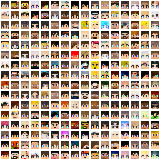

Comme nous avons oublié de stocker les pertes pendant la formation, ce script a été créé pour les récupérer à partir du fichier verbeux.

In [ ]:
data = open('out', 'r').read()

pattern = re.compile(r"\[(\d+)/(\d+)\]\[(\d+)/(\d+)\]\[(\d+)\] Loss_D: ([-+]?\d*\.\d+|\d+) Loss_G: ([-+]?\d*\.\d+|\d+) Loss_D_real: ([-+]?\d*\.\d+|\d+) Loss_D_fake ([-+]?\d*\.\d+|\d+)")

matches = pattern.findall(data)

df = pd.DataFrame(matches, columns=['epoch', 'niter', 'i', 'dataloader_size', 'gen_iterations', 'Loss_D', 'Loss_G', 'Loss_D_real', 'Loss_D_fake'])

df = df.apply(pd.to_numeric)

plt.plot(df['gen_iterations'][::100], -df['Loss_D'][::100])
plt.xlabel('Generator Iterations')
plt.ylabel('Loss_D ~ Wasserstein Distance')
plt.title('Loss_D vs. Generator Iterations')
plt.show()

Nous traçons l'évolution de la perte du discriminateur car, contrairement au GAN classique, elles sont interprétables. Il s'agit en fait d'une estimation de la distance de Wasserstein entre la distribution générée et la distribution cible. Les valeurs décroissantes sont la preuve que le modèle continue d'apprendre et n'est pas affecté par l'un des problèmes des GANs classiques.

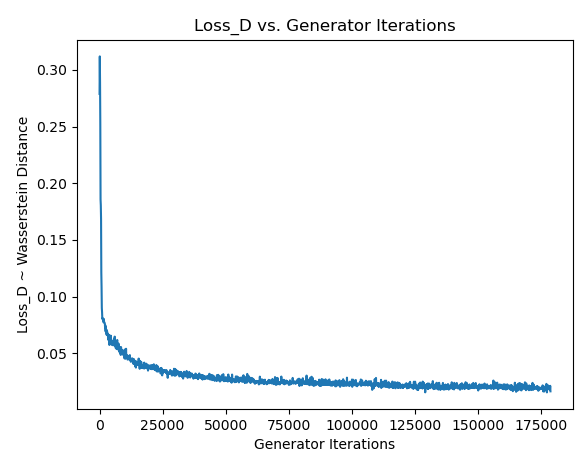

## Application
### Problème inverse : Récupérer le vecteur latent d'une image

Voici le problème d'optimisation que nous voulons résoudre :

$$\underset{z \in \mathbb{Z}}{\text{argmin}}\lVert g(z)-x_0 \rVert_2^2$$

Voici le code pour résoudre ce problème en utilisant la différenciation automatique de PyTorch :

In [ ]:
x0 = inputsv[0][None, :,:,:]

noise = torch.FloatTensor(1, nz, 1, 1).normal_(0,1)
noise.requires_grad = True


# Choisissez un optimiseur, par exemple Adam
optimizer = optim.Adam([noise], lr=0.001)


for p in netD.parameters():
    p.requires_grad = False
for p in netG.parameters():
    p.requires_grad = False

# Boucle d'optimisation
for iteration in range(100000):
    optimizer.zero_grad()

    # Générer une donnée à partir de z
    generated_data = netG(noise)

    # Calculer la perte (norme L2 au carré)
    loss = torch.norm(generated_data - x0)**2

    # Rétropropagation et optimisation
    loss.backward()
    optimizer.step()

    print(f"Iteration: {iteration}, Loss: {loss.item()}")

Voici un exemple :

- Image cible :

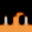

- Image trouvée :

À partir d'un vecteur latent, nous pouvons explorer l'espace engendré par le générateur.

---



In [ ]:
fixed_noise = noise.repeat(25, 1, 1, 1)

n = int(fixed_noise.shape[0]**.5)
for i in range(n):
    for j in range(n):
        fixed_noise[i*n+j] = fixed_noise[0] + i*torch.eye(nz)[0][:, None, None] + j*torch.eye(nz)[1][:, None, None]

    for n in fixed_noise:
        im = netG(n[None, :,: ,:])[0]
        plt.imshow(torch.permute(im.detach(), (1,2,0)))
        plt.show()

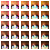

D'après les propriétés énnoncées, nous savons que la distance de Wasserstein est Lipschitz sur l'espace engendré par le générateur. Par conséquent, nous remarquons que toutes les images sont des barycentres de Wasserstein pour les autres.

## Conclusion

Notre exploration des Wasserstein GANs, telle que détaillée dans ce projet, nous a permis de nous familiariser avec des concepts clés tels que le Generative Adversarial Network (GAN), la distance de Wasserstein, et les techniques avancées de traitement de données. Cette compréhension approfondie nous a équipés avec une perspective unique et une connaissance approfondie des mécanismes sous-jacents aux GANs, ainsi que de leur potentiel dans des applications variées.

En regardant vers l'avenir, nous identifions plusieurs domaines potentiels d'amélioration et de recherche. Parmi ceux-ci, comparer les Wasserstein GANs avec d'autres formes de GANs utilisant différentes fonctions de coût se présente comme une piste prometteuse. De plus, l'optimisation des paramètres du modèle, en se concentrant sur des aspects tels que le taux d'apprentissage, le clipping, et le nombre d'itérations du discriminant, pourrait conduire à des avancées significatives dans la performance et l'efficacité des GANs.